In [32]:
import re
from typing import Dict, List, Optional, Text, Tuple
import matplotlib.pyplot as plt
from matplotlib import colors
import tensorflow as tf
from tensorflow import add
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Dropout, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Add
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import json

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!ls "/content/drive/MyDrive/ffmodel/"
file_path = "/content/drive/MyDrive/ffmodel/"
model_ce2_path = "/content/drive/MyDrive/ffmodel/model_checkpoint_ce2.keras"
model_mse_path = "/content/drive/MyDrive/ffmodel/model_checkpoint_mse.keras"

model_checkpoint_ce2.keras  model_checkpoint_mse.keras
model_checkpoint_ce.keras   test_input_data.json


In [34]:
from keras.models import load_model

model = load_model(model_mse_path)
ce_model = load_model(model_ce2_path)

In [35]:
with open(file_path + 'test_input_data.json', 'r') as json_file:
    json_data = json.load(json_file)

# input_list = json.loads(json_data)
input_list = json_data
print(input_list)
input = np.array(input_list)
print(input.shape)

# with open(file_path + 'test_label_data.json', 'r') as json_file:
#     json_data = json.load(json_file)


# # label_list = json.loads(json_data)
# label_list = json_data
# print(label_list)
# label = np.array(label_list)
# print(label.shape)

[[[[1002.0, 33.27626419067383, 4.1345062255859375, 287.2908020019531, 310.2669677734375, 0.006102265324443579, 0.0, -2.336158514022827, 3604.0, 0.03553067147731781, 75.70858001708984, 0.0], [1021.0, 33.952789306640625, 4.121321201324463, 287.3239440917969, 310.24664306640625, 0.006123162340372801, 0.0, -2.3544490337371826, 3961.0, 0.0, 75.62196350097656, 0.0], [1023.0, 34.630897521972656, 4.108397960662842, 287.3564453125, 310.22491455078125, 0.006144112907350063, 0.0, -2.3640072345733643, 4315.0, 0.0, 75.53280639648438, 0.0], [1051.0, 35.302486419677734, 4.095799922943115, 287.3878479003906, 310.2018737792969, 0.006164950784295797, 0.0, -2.3683865070343018, 4717.0, 0.0, 75.44094848632812, 0.0], [1046.0, 35.95945739746094, 4.083590984344482, 287.4177551269531, 310.177490234375, 0.006185512058436871, 0.0, -2.3699276447296143, 4717.0, 0.0, 75.34622955322266, 0.0], [1045.0, 36.593711853027344, 4.071834087371826, 287.4457092285156, 310.15179443359375, 0.006205632351338863, 0.0, -2.37009334

In [49]:
def predict_mse_model(model, x):
    prediction = model.predict(x)
    print(prediction.shape)
    prediction = np.where(prediction < -0.1, -1, np.where(prediction < 0.1, 0, 1))
    prediction = np.squeeze(prediction, axis=-1)
    return prediction

def predict_ce_model(model, x):
    prediction = ce_model.predict(x)
    print(prediction.shape)
    prediction = np.argmax(prediction, axis=-1)
    print(prediction.shape)
    return prediction

prediction = predict_mse_model(model, input)
# prediction = predict_ce_model(ce_model, input)
print(type(prediction))
print(prediction)

1/1 [==============================] - 0s 56ms/step
(1, 32, 32, 1)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [50]:
TITLES = [
  'Elevation',
  'Wind\ndirection',
  'Wind\nvelocity',
  'Min\ntemp',
  'Max\ntemp',
  'Humidity',
  'Precip',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy\nrelease\ncomponent',
  'Previous\nfire\nmask',
  'Fire\nmask',
  'Predicted\nfire\nmask'
]

In [53]:
# Number of rows of data samples to plot
n_rows = 1
# Number of data variables
n_features = input.shape[3]
# Variables for controllong the color map for the fire masks
CMAP = colors.ListedColormap(['black', 'silver', 'orangered'])
BOUNDS = [-1, -0.1, 0.1, 1]
OBOUNDS = [-1, -0.1, 0.1, 1]
ONORM = colors.BoundaryNorm(OBOUNDS, CMAP.N)
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

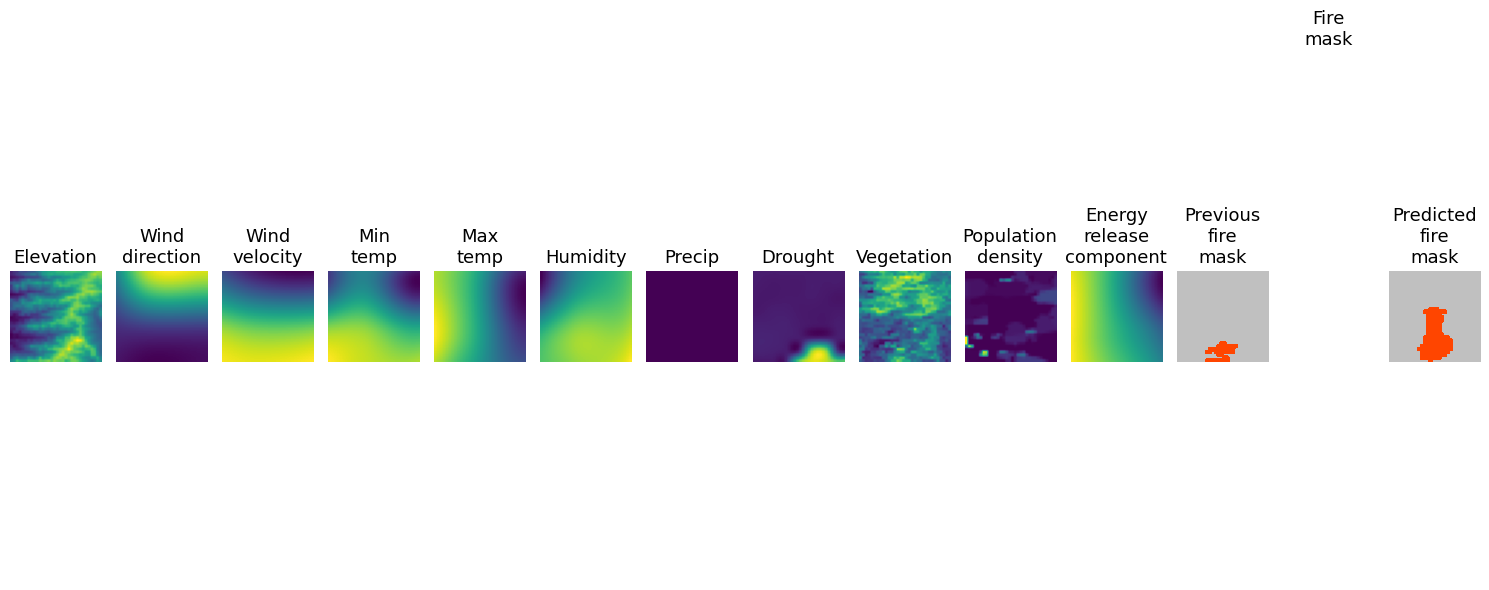

In [54]:
fig = plt.figure(figsize=(15,6))


for i in range(n_rows):
  for j in range(n_features + 2):
    plt.subplot(n_rows, n_features + 2, i * (n_features + 2) + j + 1)
    if i == 0:
      plt.title(TITLES[j], fontsize=13)
    if j < n_features - 1:
      plt.imshow(input[i, :, :, j], cmap='viridis')
    if j == n_features - 1:
      plt.imshow(input[i, :, :, -1], cmap=CMAP, norm=NORM)
    if j == n_features:
      pass
    if j == n_features+1:
      plt.imshow(prediction[i, :, :], cmap=CMAP, norm=ONORM)
    plt.axis('off')
plt.tight_layout()